In [260]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from scipy.stats import mode
import matplotlib.pyplot as plt

In [261]:
# load the dataset using pandas
df = pd.read_excel("Concrete_Data.xlsx")

In [262]:
# split the dataframe into a training and testing splits with a 70% / 30% ratio
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducability

In [263]:
df_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.90,28,25.724350
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.00,7,17.540269
81,318.80,212.5,0.00,155.70,14.30,852.1,880.40,3,25.200348
526,359.00,19.0,141.00,154.00,10.91,942.0,801.00,3,23.639177
830,162.00,190.0,148.00,179.00,19.00,838.0,741.00,28,33.756745
...,...,...,...,...,...,...,...,...,...
87,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,3,24.400556
330,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,14,42.216615
466,190.34,0.0,125.18,166.61,9.88,1079.0,798.90,100,33.563692
121,475.00,118.8,0.00,181.10,8.90,852.1,781.50,28,68.299493


In [264]:
df_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,284.409681,74.971886,52.006588,181.805576,6.125337,973.798128,771.636297,46.049931,36.152573
std,108.361334,87.717335,63.707358,21.159956,6.046367,78.509208,80.125492,61.650743,16.803402
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,165.620000,0.000000,932.000000,724.300000,14.000000,23.890343
50%,277.000000,22.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000,35.076402
75%,362.600000,145.000000,117.540000,192.000000,10.100000,1040.000000,821.000000,56.000000,46.247292
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [265]:
# extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 35.076402024
Percentage of 'strong' samples: 49.930651872399444 %


## Bagging from Scratch

In [266]:
class GenericBagging:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.initialize_estimators()
        
    def initialize_estimators(self):
        # initialize the given number of estimators
        for _ in range(self.n_estimators):
            # Don't change the decision tree parameters
            self.estimators.append(DecisionTreeClassifier(max_depth=5, random_state=0))

    def generate_data_subset(self, X, y):
        # TODO: Generate bootstrap samples (with replacement)
        # Use a subset size of 300 samples
        # pass
        indices = np.random.choice(X.shape[0], size=300, replace=True)
        return X[indices], y[indices]


    def fit(self, X, y):
        # TODO: loop over each classifier and fit on random data subset
        # pass
        for i, estimator in enumerate(self.estimators):
            X_subset, y_subset = self.generate_data_subset(X, y)
            estimator.fit(X_subset, y_subset)

    def predict(self, X):
        # TODO: implement prediction function using majority vote
        # pass
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)
        majority_votes = mode(predictions, axis=1)[0]
        return majority_votes.flatten()
    
    def calculate_oob_error(self, X, Y):
        # TODO: calculate Out-of-Bag error
        # The out-of-bag (OOB) error is the average error for each training observation
        # calculated using predictions from the trees that do not contain this training observation
        # in their respective bootstrap sample. 
        # pass
        
        oob_errors = []

        for i, estimator in enumerate(self.estimators):

            all_indicies = np.arange(X.shape[0])
            used_indicies = np.zeros(X.shape[0], dtype=bool)


            X_subset, y_subset = self.generate_data_subset(X, Y)
            X_subset_indicies = X_subset.astype(int)

            used_indicies[X_subset_indicies] = True
            oob_indices = all_indicies[~used_indicies]

            if len(oob_indices) == 0:
                continue

            oob_prediction = estimator.predict(X[oob_indices])
            oob_error = 1 - np.mean(oob_prediction == Y[oob_indices])
            # oob_error = 1 - np.mean(oob_prediction != Y[oob_indices])
            oob_errors.append(oob_error)

        return np.mean(oob_errors)

In [267]:
def get_scores(n_estimators):
    # run model bagging and compute OOB error and test accuracy
    model = GenericBagging(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return model.calculate_oob_error(X_train, y_train), accuracy_score(y_test, y_test_predict)

In [268]:
def run_bagging():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    oob_errors = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        oob_error, test_accuracy = get_scores(n_estimators)
        oob_errors.append(oob_error)
        test_accuracies.append(test_accuracy)
    
    # TODO: plot the output scores against n_estimators
    plt.figure(figsize=(8, 6))
    plt.plot(n_estimators_options, oob_errors, label='Out-of-Bag Error')
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score')
    plt.title('Bagging Performance')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(n_estimators_options, oob_errors, label='Out-of-Bag Error')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score')
    plt.title('Bagging Performance')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score')
    plt.title('Bagging Performance')
    plt.legend()
    plt.show()

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_19160\1405313257.py:35: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_votes = mode(predictions, axis=1)[0]
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_19160\1405313257.py:35: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this

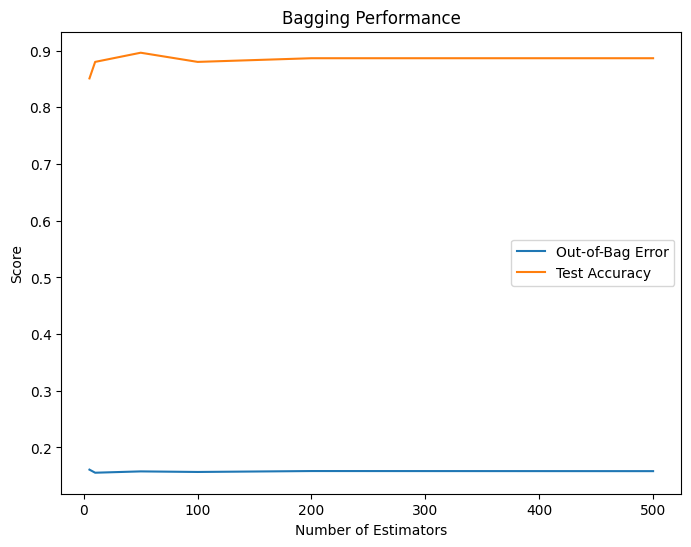

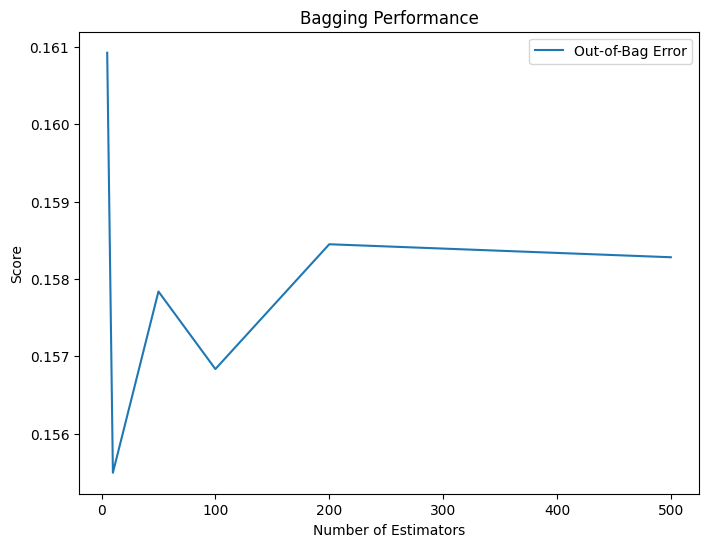

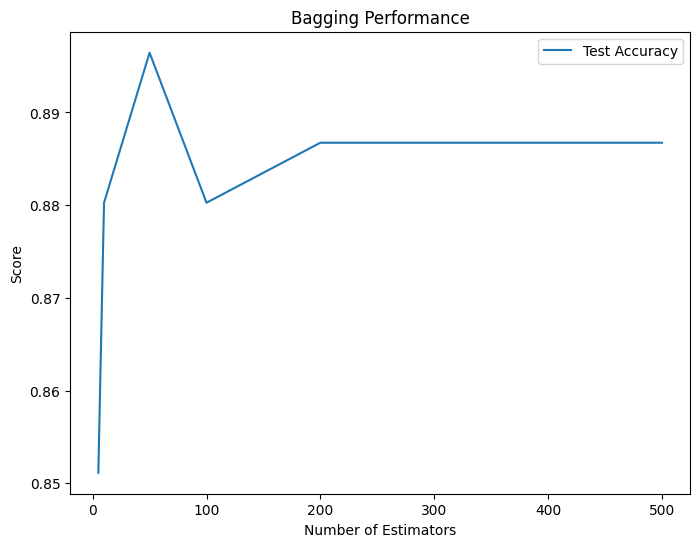

In [269]:
run_bagging()

Test accuracy increases with increasing number of estimators <br> 
then it becomes constant when number of estimators is 200 or more<br>

while out-of-bag error decreases with increasing number of estimators <br> especially when number of estimators is 200 or more<br>

## AdaBoost from Scratch

In [270]:
class GenericBoosting:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def create_estimator(self):
        # create a decision stump as a weak estimator
        return DecisionTreeClassifier(max_depth=1, random_state=0)

    def fit_and_predict(self, X_train, Y_train, X_test, Y_test):
        # apply AdaBoost on weak estimators

        # Y_train = Y_train.astype(int)
        Y_train = np.where(Y_train == 0, -1, 1)
        # Y_test = Y_test.astype(int)
        Y_test = np.where(Y_test == 0, -1, 1)

        
        ## initialize the training and test data with empty array placeholders
        pred_train = np.empty((self.n_estimators, X_train.shape[0]))
        pred_test = np.empty((self.n_estimators, X_test.shape[0]))
        
        # initialize weights
        W = np.ones((X_train.shape[0],)) / X_train.shape[0]

        # loop over the boosting iterations 
        for idx in range(self.n_estimators): 

            # create and fit a new decision stump
            model = self.create_estimator().fit(X_train, Y_train, sample_weight=W)

            # predict classes for the training data and test data
            pred_train_idx = model.predict(X_train)
            pred_test_idx = model.predict(X_test)

            # TODO: calculate the miss Indicator
            miss_indicator = (pred_train_idx != Y_train)

            # TODO: calculate the error for the current classifier
            cls_err =  np.sum(W * miss_indicator) / np.sum(W)

            # TODO: calculate current classifier weight
            cls_alpha = 0.5 * np.log((1 - cls_err) / cls_err)

            # TODO: update the weights 
            W = W * np.exp(-cls_alpha * Y_train * pred_train_idx)

            # TODO: add to the overall predictions
            pred_train[idx] = cls_alpha * pred_train_idx
            pred_test[idx] = cls_alpha * pred_test_idx

            # normalize weights 
            W = W / np.sum(W)

        # TODO: return accuracy on train and test sets
        train_accuracy = accuracy_score(Y_train, np.sign(np.sum(pred_train, axis=0)))
        test_accuracy = accuracy_score(Y_test, np.sign(np.sum(pred_test, axis=0)))

        
        return train_accuracy, test_accuracy

In [271]:
def get_scores(n_estimators):
    # run model boosting and compute train and test accuracy
    model = GenericBoosting(n_estimators=n_estimators)
    train_accuracy, test_accuracy = model.fit_and_predict(X_train, y_train, X_test, y_test)
    return train_accuracy, test_accuracy

In [272]:
def run_boosting():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    train_accuracies = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        train_accuracy, test_accuracy = get_scores(n_estimators)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # TODO: plot the output scores against n_estimators
    plt.figure(figsize=(8, 6))
    plt.plot(n_estimators_options, train_accuracies, label='Train Accuracy')
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score')
    plt.title('Bagging Performance')
    plt.legend()
    plt.show()

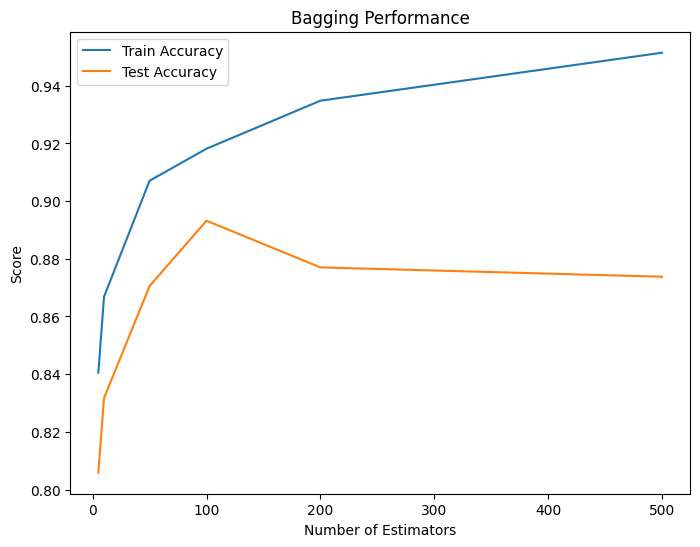

In [273]:
run_boosting()

with increasing number of estimators <br>
train accuracy always increases <br>
test accuracy increases to a certain point, then it decreases when the number of estimators is about 100<br>

